In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.sentiment import sentiment_analyzer
from nltk.tokenize import word_tokenize
import nltk
nltk.download("punkt")
plt.style.use("ggplot")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\punee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [85]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [115]:
# importing the data 

data = pd.read_csv(r"C:\Users\punee\Downloads\product review\Reviews.csv")

In [116]:
# cleaning and preprocessing

data.shape

# return number of  rows and number of columns 

(568454, 10)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
# checking for null values 
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [11]:
# droping the data 

data_updated =data.dropna()

In [13]:
data_updated.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [15]:
# checking for Nan values 

data_updated.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [17]:
# describing the data 

data_updated.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568401.000000,568401.000000,568401.000000,568401.000000,568401
mean,284228.120582,1.743903,2.227911,4.183297,1970-01-01 00:00:01.296260632
min,1.000000,0.000000,0.000000,1.000000,1970-01-01 00:00:00.939340800
25%,142116.000000,0.000000,0.000000,4.000000,1970-01-01 00:00:01.271289600
50%,284225.000000,0.000000,1.000000,5.000000,1970-01-01 00:00:01.311120
75%,426342.000000,2.000000,2.000000,5.000000,1970-01-01 00:00:01.332720
max,568454.000000,866.000000,923.000000,5.000000,1970-01-01 00:00:01.351209600
std,164098.955187,7.636845,8.288820,1.310376,NaN


In [19]:
# fetching usefull column for analysis 

data_updated.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [21]:
product_review = data_updated.get(["UserId" , "ProductId" , "Score" , "Text"])

In [23]:
# choosing sample from the large dataset 

product_review= product_review.sample(1000)

In [25]:
product_review.head()

,UserId,ProductId,Score,Text
10834,A3HTMUB72A5P79,B0034KP00S,1,"At the time of purchase, the production descri..."
67541,A2VVOX786E95FJ,B00028OHJA,2,If what I ordered and what I received were act...
389416,A1LV14I3QX7TQC,B000HTJH58,5,I've tried a few of Bakery On Main's gluten-fr...
422897,A192FZK8BO3O4X,B0040IWJ5W,5,This Pillsbury Cake Mix is the best. It is ou...
110888,AE4CSAQTJ0Y1O,B0085YB426,1,This coffee has a really bitter taste and leav...


In [28]:
# applying sentimental analysis 

def get_text(text):
    return TextBlob(text).sentiment.polarity


product_review['sentiment'] = product_review['Text'].apply(get_text)

In [30]:
product_review

,UserId,ProductId,Score,Text,sentiment
10834,A3HTMUB72A5P79,B0034KP00S,1,"At the time of purchase, the production descri...",0.069643
67541,A2VVOX786E95FJ,B00028OHJA,2,If what I ordered and what I received were act...,0.161111
389416,A1LV14I3QX7TQC,B000HTJH58,5,I've tried a few of Bakery On Main's gluten-fr...,0.111376
422897,A192FZK8BO3O4X,B0040IWJ5W,5,This Pillsbury Cake Mix is the best. It is ou...,0.780000
110888,AE4CSAQTJ0Y1O,B0085YB426,1,This coffee has a really bitter taste and leav...,0.116667
...,...,...,...,...,...
438701,A2ITQBMQSS7P0D,B005HGAV8I,2,We ordered this package of 35 because it had t...,-0.195312
69703,A3J9MVICLD48E3,B003CK7O36,5,Bought this at a public store a few years ago ...,0.244792
511426,A1VHCPTDTTIZ9T,B001A5VLYS,4,This tea surprised me. I tend to like strong f...,0.462121
156531,A2GR58HBGSNN46,B000E48IMY,5,"Something a morning, afternoon, or any time of...",0.450000


In [55]:
# applaying labels 
def get_score(polarity) :
    if polarity < -0.05:
            return "Negative"
    elif -0.05 <= polarity <= 0.05:
            return "Neutral"
    else:
        return "Positive"


product_review['sentiment_label'] = product_review['sentiment'].apply(get_score)

In [57]:
product_review .head()

,UserId,ProductId,Score,Text,sentiment,sentiment_label
10834,A3HTMUB72A5P79,B0034KP00S,1,"At the time of purchase, the production descri...",0.069643,Positive
67541,A2VVOX786E95FJ,B00028OHJA,2,If what I ordered and what I received were act...,0.161111,Positive
389416,A1LV14I3QX7TQC,B000HTJH58,5,I've tried a few of Bakery On Main's gluten-fr...,0.111376,Positive
422897,A192FZK8BO3O4X,B0040IWJ5W,5,This Pillsbury Cake Mix is the best. It is ou...,0.780000,Positive
110888,AE4CSAQTJ0Y1O,B0085YB426,1,This coffee has a really bitter taste and leav...,0.116667,Positive


In [44]:
product_review['sentiment']

10834     0.069643
67541     0.161111
389416    0.111376
422897    0.780000
110888    0.116667
            ...   
438701   -0.195312
69703     0.244792
511426    0.462121
156531    0.450000
512058    0.350000
Name: sentiment, Length: 1000, dtype: float64

In [59]:
# grouping based on labels 

product_review['sentiment_label'].value_counts()

sentiment_label
Positive    830
Neutral     109
Negative     61
Name: count, dtype: int64

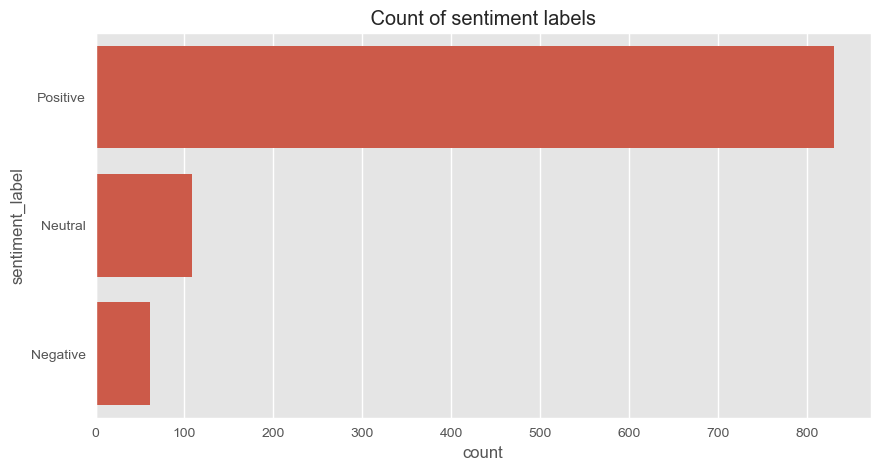

In [95]:
# visualizing the data 

plt.figure(figsize=(10,5))
sns.countplot(product_review['sentiment_label'])
plt.title(" Count of sentiment labels ")
plt.show()

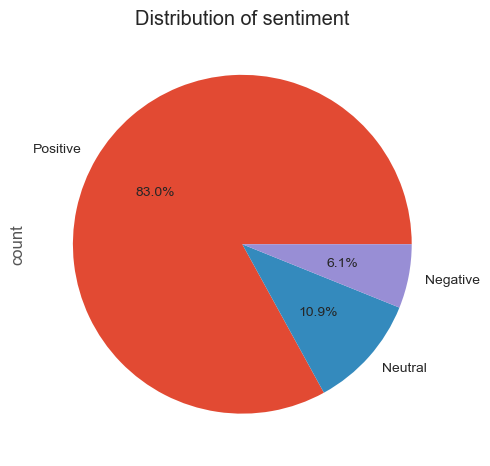

In [103]:
# pie chart distribution 

product_review['sentiment_label'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Distribution of sentiment")
plt.show()

# insights 

---

**Sentiment Distribution (Sample: 1,000 Data Points)**  
- **Positive**: 83% (830 reviews)  
- **Neutral**: 10.9% (109 reviews)  
- **Negative**: 6.1% (61 reviews)  

---

### Key Observations:
1. **Dominant Sentiment**: Positive reviews overwhelmingly dominate the dataset (83%).
2. **Minor Concerns**: Only 6.1% of the data reflects negative sentiment, suggesting limited dissatisfaction.
3. **Neutral Context**: ~11% of responses lack strong emotional polarity (e.g., factual statements).

---




# Recomndation


---

### **1. Leverage Positive Sentiment**
-  **Amplify Success Stories**:  
  Promote positive reviews on social media, websites, and ads to build trust.  
  *Example*: Create a "Customer Love" campaign featuring testimonials.
  
-  **Identify Drivers of Satisfaction**:  
  Analyze common themes in positive feedback (e.g., "user-friendly interface" or "fast delivery") to reinforce strengths.

- **Reward Loyal Advocates**:  
  Offer discounts or loyalty perks to customers who leave positive reviews.

---

### **2. Address Neutral Sentiment**
- **Engage Neutral Customers**:  
  Send follow-up surveys to understand why they’re undecided.  
  *Example*: “How can we improve your experience?”
  
-  **Personalized Outreach**:  
  Use targeted emails with special offers to convert neutral users into promoters.

---

### **3. Mitigate Negative Sentiment**
-  **Prioritize Complaint Resolution**:  
  Assign a dedicated team to resolve issues from negative feedback within 24 hours.  

-  **Root Cause Analysis**:  
  Identify recurring pain points (e.g., “slow customer support” or “product defects”) and implement fixes.  

-  **Turn Detractors into Advocates**:  
  Offer refunds/replacements and follow up to ensure satisfaction.  


---

### **4. Long-Term Strategies**
- **Continuous Monitoring**:  
  Automate sentiment tracking to detect shifts in real-time (e.g., sudden spikes in negativity).  

-  **Benchmark Against Competitors**:  
  Compare sentiment scores with industry averages to identify gaps.  

- **Invest in Loyalty Programs**:  
  Strengthen retention by rewarding repeat customers.  

---

